## DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>




## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import Normalizer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

# from plotly import plotly
# import plotly.offline as offline
# import plotly.graph_objs as go
# offline.init_notebook_mode()
from collections import Counter

# 1. READING FILES 

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data (project data) ", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (project data)  (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data (resource data) ", resource_data.shape)
print('-'*50)
print("The attributes of data :", resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (resource data)  (1541272, 4)
--------------------------------------------------
The attributes of data : ['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


### 1.1 Preprocessing Categorical Features: project_grade_category

In [5]:
print("Project grade" ,project_data['project_grade_category'].value_counts())
## visulaize how project grade looks like
print('-'*50)
print(project_data['project_grade_category'].values[1000])
print(project_data['project_grade_category'].values[1500])

Project grade Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64
--------------------------------------------------
Grades 3-5
Grades PreK-2


Remove spaces , convert "-" to "_" and convert letters to lower case and remove grades as it is repeated

In [6]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('Grades ','')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

prek_2    44225
3_5       37137
6_8       16923
9_12      10963
Name: project_grade_category, dtype: int64

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# reference from course material : reference_EDA.ipynb  
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,prek_2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,6_8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


In [8]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))    

In [9]:
#examples after preprocessing subject

print(project_data['clean_categories'].values[100])
print('-'*50)
print(project_data['clean_categories'].values[200])
print('-'*50)

Literacy_Language Math_Science
--------------------------------------------------
AppliedLearning
--------------------------------------------------


### 1.3  Preprocessing Categorical Features: project_subject_subcategories 

In [10]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# reference from course material : reference_EDA.ipynb 
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())
    
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)    
    
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

#### 1.3  Preprocessing Categorical Features: school_state

In [11]:
project_data['school_state'].value_counts()
## Convert it to lower
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

#### 1.4  Preprocessing Categorical Features: Teacher_prefix

In [12]:
print(project_data['teacher_prefix'].value_counts())
# try to remove the dots from the teacher prefix
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')
project_data['teacher_prefix']=project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix']=project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix']=project_data['teacher_prefix'].str.strip()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64


#### 1.5  Combining all the essays

In [13]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

#### 1.6  Number of Words in the Essay and Title

In [14]:
source:''''https://www.geeksforgeeks.org/python-program-to-count-words-in-a-sentence/'''
words_counter=[]
for string in project_data['essay']:
    res = len(re.findall(r'\w+', string))
    words_counter.append(res)
    
project_data["words_in_essay"] = words_counter

words_counter=[]

for string in project_data['project_title']:
    res = len(re.findall(r'\w+', string))
    words_counter.append(res)
project_data["words_in_title"] = words_counter    

## 1.7. Preprocessing Numerical Values: price

In [15]:
## calculate the overall count of resources and the total price for each project id 
price_data=resource_data.groupby('id').agg({'price':'sum','quantity':'sum' })

In [16]:
project_data=pd.merge(project_data, price_data, on='id', how='left')

## 1.8 Preprocessing Text Features: project_title

In [17]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
project_data['project_title'].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [20]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [21]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [22]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 36099.69it/s]


In [23]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])
#merge the column in the project_data
project_data['processed_title']=preprocessed_titles

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


# 1.9 Preprocessing Categorical Features: essay

In [24]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [25]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:13<00:00, 1488.95it/s]


In [26]:
print("printing some random essay")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

#merge the column in the project_data
project_data['processed_essay']=preprocessed_essays

printing some random essay
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge not great books resources every day many not afforded opportunity engage big colorful pages book regular basis home not travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal nannan
--------------------------------------------------
34 students mainly come extremely low income families majority come homes parents work full time students s

## Train,Test,CV Split

In [27]:
# train test split using sklearn.model selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'],random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train,random_state=0)

In [28]:
## drop the y labels from splits
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [29]:
X_train.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,words_in_essay,words_in_title,price,quantity,processed_title,processed_essay
75742,118221,p186156,f50f55a2b44b65b54f38f03c5df21922,mrs,tx,2017-03-01 16:21:46,9_12,I-Waste: a Multi-Media Art Installation on El...,My students are creative human beings. They a...,It's no secret that the arts are underfunded i...,...,0,Music_Arts,VisualArts,My students are creative human beings. They a...,241,10,945.90,5,waste multi media art installation electronic ...,students creative human beings sculpture ceram...
61001,57644,p180433,9e0fb5827f551d7e6966f8b3985e387b,ms,ny,2017-03-09 10:19:06,6_8,Authentic Listening and Speaking Activities fo...,The Hyde Park Central School District is locat...,One area my students struggle the most with is...,...,0,Literacy_Language,ForeignLanguages,The Hyde Park Central School District is locat...,254,10,100.63,35,authentic listening speaking activities world ...,hyde park central school district located nort...


### VECTORIZING DATA

### One hot encoding on Categorical

In [30]:
# we use count vectorizer to convert the values into one hot vectors 
## clean categories
from sklearn.feature_extraction.text import CountVectorizer

cat_vectorize = CountVectorizer(lowercase=False, binary=True)
cat_vectorize.fit(X_train['clean_categories'].values)

train_categories = cat_vectorize.transform(X_train['clean_categories'].values)
test_categories = cat_vectorize.transform(X_test['clean_categories'].values)
cv_categories = cat_vectorize.transform(X_cv['clean_categories'].values)

print(cat_vectorize.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",train_categories.shape)
print("Shape of matrix of Test data after one hot encoding ",test_categories.shape)
print("Shape of matrix of CV data after one hot encoding ",cv_categories.shape)

['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']
Shape of matrix of Train data after one hot encoding  (49041, 9)
Shape of matrix of Test data after one hot encoding  (36052, 9)
Shape of matrix of CV data after one hot encoding  (24155, 9)


In [31]:
# we use count vectorizer to convert the values into one hot vectors 
## clean subcategories
from sklearn.feature_extraction.text import CountVectorizer

subcat_vectorize = CountVectorizer(lowercase=False, binary=True)
subcat_vectorize.fit(X_train['clean_subcategories'].values)

train_subcategories = subcat_vectorize.transform(X_train['clean_subcategories'].values)
test_subcategories = subcat_vectorize.transform(X_test['clean_subcategories'].values)
cv_subcategories = subcat_vectorize.transform(X_cv['clean_subcategories'].values)

print(subcat_vectorize.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",train_subcategories.shape)
print("Shape of matrix of Test data after one hot encoding ",test_subcategories.shape)
print("Shape of matrix of CV data after one hot encoding ",cv_subcategories.shape)


['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']
Shape of matrix of Train data after one hot encoding  (49041, 30)
Shape of matrix of Test data after one hot encoding  (36052, 30)
Shape of matrix of CV data after one hot encoding  (24155, 30)


In [32]:
# we use count vectorizer to convert the values into one hot vectors 
##  school state
from sklearn.feature_extraction.text import CountVectorizer

sklstate_vectorize = CountVectorizer(lowercase=False, binary=True)
sklstate_vectorize.fit(X_train['school_state'].values)

sklstate_train = sklstate_vectorize.transform(X_train['school_state'].values)
sklstate_test = sklstate_vectorize.transform(X_test['school_state'].values)
sklstate_cv = sklstate_vectorize.transform(X_cv['school_state'].values)

print(sklstate_vectorize.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",sklstate_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sklstate_test.shape)
print("Shape of matrix of CV data after one hot encoding ",sklstate_cv.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix of Train data after one hot encoding  (49041, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of CV data after one hot encoding  (24155, 51)


In [33]:
# we use count vectorizer to convert the values into one hot vectors 
## teacher_prefix
from sklearn.feature_extraction.text import CountVectorizer

teacher_prefix_vectorize = CountVectorizer(lowercase=False, binary=True)
teacher_prefix_vectorize.fit(X_train['teacher_prefix'].values)

teacher_prefix_train = teacher_prefix_vectorize.transform(X_train['teacher_prefix'].values)
teacher_prefix_test = teacher_prefix_vectorize.transform(X_test['teacher_prefix'].values)
teacher_prefix_cv = teacher_prefix_vectorize.transform(X_cv['teacher_prefix'].values)

print(teacher_prefix_vectorize.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",teacher_prefix_train.shape)
print("Shape of matrix of Test data after one hot encoding ",teacher_prefix_test.shape)
print("Shape of matrix of CV data after one hot encoding ",teacher_prefix_cv.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix of Train data after one hot encoding  (49041, 5)
Shape of matrix of Test data after one hot encoding  (36052, 5)
Shape of matrix of CV data after one hot encoding  (24155, 5)


In [34]:
# we use count vectorizer to convert the values into one hot vectors 
## project_grade
from sklearn.feature_extraction.text import CountVectorizer

proj_grade_vectorize = CountVectorizer(lowercase=False, binary=True)
proj_grade_vectorize.fit(X_train['teacher_prefix'].values)

proj_grade_train = proj_grade_vectorize.transform(X_train['teacher_prefix'].values)
proj_grade_test = proj_grade_vectorize.transform(X_test['teacher_prefix'].values)
proj_grade_cv = proj_grade_vectorize.transform(X_cv['teacher_prefix'].values)

print(proj_grade_vectorize.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",proj_grade_train.shape)
print("Shape of matrix of Test data after one hot encoding ",proj_grade_test.shape)
print("Shape of matrix of CV data after one hot encoding ",proj_grade_cv.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix of Train data after one hot encoding  (49041, 5)
Shape of matrix of Test data after one hot encoding  (36052, 5)
Shape of matrix of CV data after one hot encoding  (24155, 5)


## Vectorizing Text data

#### A. BOW on Essay

##### Train data

In [35]:
 ##Considering the words that appeared in atleast 10 documents 

bow_essay = CountVectorizer(min_df=10,max_features=5000)  
bow_essay.fit(X_train['processed_essay'])

bow_essay_train = bow_essay.transform(X_train['processed_essay'])

print("Shape of matrix after one hot encoding ",bow_essay_train.shape)   

Shape of matrix after one hot encoding  (49041, 5000)


##### Test data

In [36]:

bow_essay_test = bow_essay.transform(X_test['processed_essay'])

print("Shape of matrix after one hot encoding ",bow_essay_test.shape)  

Shape of matrix after one hot encoding  (36052, 5000)


##### CV data

In [37]:
bow_essay_cv = bow_essay.transform(X_cv['processed_essay'])
print("Shape of matrix after one hot encoding ",bow_essay_cv.shape)  

Shape of matrix after one hot encoding  (24155, 5000)


#### A. BOW on Titles

##### Train data 

In [38]:
 ##Considering the words that appeared in atleast 10 documents 

bowtitle = CountVectorizer(min_df=10)  
bowtitle.fit(X_train['processed_title'])

bow_title_train = bowtitle.transform(X_train['processed_title'])

print("Shape of matrix after one hot encoding ",bow_title_train.shape)   

Shape of matrix after one hot encoding  (49041, 2008)


##### Test data 

In [39]:
 ##Considering the words that appeared in atleast 10 documents 


bow_title_test = bowtitle.transform(X_test['processed_title'])

print("Shape of matrix after one hot encoding ",bow_title_test.shape)   

Shape of matrix after one hot encoding  (36052, 2008)


##### CV data 

In [40]:
 ##Considering the words that appeared in atleast 10 documents 

bow_title_cv = bowtitle.transform(X_cv['processed_title'])

print("Shape of matrix after one hot encoding ",bow_title_cv.shape)   

Shape of matrix after one hot encoding  (24155, 2008)


#### A. TFIDF on Essay

##### Train data

In [41]:
 ##Considering the words that appeared in atleast 10 documents 

tfidf_essay = TfidfVectorizer(min_df=10,max_features=5000)  #selecting top 5000 features
tfidf_essay.fit(X_train['processed_essay'])

tfidf_essay_train = tfidf_essay.transform(X_train['processed_essay'])

print("Shape of matrix after one hot encoding ",tfidf_essay_train.shape)   

Shape of matrix after one hot encoding  (49041, 5000)


##### Test data

In [42]:

tfidf_essay_test = tfidf_essay.transform(X_test['processed_essay'])

print("Shape of matrix after one hot encoding ",tfidf_essay_test.shape)  

Shape of matrix after one hot encoding  (36052, 5000)


##### CV data

In [43]:


tfidf_essay_cv = tfidf_essay.transform(X_cv['processed_essay'])

print("Shape of matrix after one hot encoding ",tfidf_essay_cv.shape)  

Shape of matrix after one hot encoding  (24155, 5000)


#### A. TFIDF on Titles

##### Train data 

In [44]:
 ##Considering the words that appeared in atleast 10 documents 

tfidftitle = TfidfVectorizer(min_df=10)  
tfidftitle.fit(X_train['processed_title'])

tfidf_title_train = tfidftitle.transform(X_train['processed_title'])

print("Shape of matrix after one hot encoding ",tfidf_title_train.shape)   

Shape of matrix after one hot encoding  (49041, 2008)


##### Test data 

In [45]:
 ##Considering the words that appeared in atleast 10 documents 

tfidf_title_test = tfidftitle.transform(X_test['processed_title'])

print("Shape of matrix after one hot encoding ",tfidf_title_test.shape)   

Shape of matrix after one hot encoding  (36052, 2008)


##### CV data 

In [46]:
 ##Considering the words that appeared in atleast 10 documents 

tfidf_title_cv = tfidftitle.transform(X_cv['processed_title'])

print("Shape of matrix after one hot encoding ",tfidf_title_cv.shape)   

Shape of matrix after one hot encoding  (24155, 2008)


### Vectorizing Numerical Features

### Price

In [47]:
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

## reshaping 
X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_cv_price_norm=X_cv_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


#### Quantity

In [48]:

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(1,-1))

quantity_train_norm = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
quantity_cv_norm = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
quantity_test_norm = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(quantity_train_norm.shape, y_train.shape)
print(quantity_cv_norm.shape, y_cv.shape)
print(quantity_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
quantity_train_norm=quantity_train_norm.reshape(-1,1)
quantity_cv_norm=quantity_cv_norm.reshape(-1,1)
quantity_test_norm=quantity_test_norm.reshape(-1,1)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


### Number of Previously posted projects

In [49]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

prev_projects_train_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
prev_projects_cv_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
prev_projects_test_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

print("After vectorizations")
print(prev_projects_train_norm.shape, y_train.shape)
print(prev_projects_cv_norm.shape, y_cv.shape)
print(prev_projects_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
prev_projects_train_norm=prev_projects_train_norm.reshape(-1,1)
prev_projects_cv_norm=prev_projects_cv_norm.reshape(-1,1)
prev_projects_test_norm=prev_projects_test_norm.reshape(-1,1)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


### Title Word counts

In [50]:
normalizer = Normalizer()

normalizer.fit(X_train['words_in_title'].values.reshape(1,-1))

title_word_count_train_norm = normalizer.transform(X_train['words_in_title'].values.reshape(1,-1))
title_word_count_cv_norm = normalizer.transform(X_cv['words_in_title'].values.reshape(1,-1))
title_word_count_test_norm = normalizer.transform(X_test['words_in_title'].values.reshape(1,-1))

print("After vectorizations")
print(title_word_count_train_norm.shape, y_train.shape)
print(title_word_count_cv_norm.shape, y_cv.shape)
print(title_word_count_test_norm.shape, y_test.shape)
print("="*100)

## reshaping 
title_word_count_train_norm=title_word_count_train_norm.reshape(-1,1)
title_word_count_cv_norm=title_word_count_cv_norm.reshape(-1,1)
title_word_count_test_norm=title_word_count_test_norm.reshape(-1,1)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


#### Essay Words Counts

In [51]:
normalizer = Normalizer()

normalizer.fit(X_train['words_in_essay'].values.reshape(1,-1))

essay_word_count_train_norm = normalizer.transform(X_train['words_in_essay'].values.reshape(1,-1))
essay_word_count_cv_norm = normalizer.transform(X_cv['words_in_essay'].values.reshape(1,-1))
essay_word_count_test_norm = normalizer.transform(X_test['words_in_essay'].values.reshape(1,-1))

print("After vectorizations")
print(essay_word_count_train_norm.shape, y_train.shape)
print(essay_word_count_cv_norm.shape, y_cv.shape)
print(essay_word_count_test_norm.shape, y_test.shape)

## reshaping 
essay_word_count_train_norm=essay_word_count_train_norm.reshape(-1,1)
essay_word_count_cv_norm=essay_word_count_cv_norm.reshape(-1,1)
essay_word_count_test_norm=essay_word_count_test_norm.reshape(-1,1)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


## Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

####  SET1 :Apply Multinomial NB on these feature sets (categorical, numerical features + preprocessed_eassay (BOW))

#### Step 1 : Find best hyperparameter with maximum AUC 

In [52]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack


X_train_bow = hstack((train_categories, train_subcategories,sklstate_train,teacher_prefix_train,
            proj_grade_train,bow_essay_train,bow_title_train,
            X_train_price_norm,quantity_train_norm,prev_projects_train_norm,title_word_count_train_norm,
            essay_word_count_train_norm)).tocsr()

X_test_bow = hstack((test_categories, test_subcategories,sklstate_test,teacher_prefix_test,
            proj_grade_test,bow_essay_test,bow_title_test,
            X_test_price_norm,quantity_test_norm,prev_projects_test_norm,title_word_count_test_norm,
            essay_word_count_test_norm)).tocsr()

X_cv_bow = hstack((cv_categories, cv_subcategories,sklstate_cv,teacher_prefix_cv,
            proj_grade_cv,bow_essay_cv,bow_title_cv,
            X_cv_price_norm,quantity_cv_norm,prev_projects_cv_norm,title_word_count_cv_norm,
            essay_word_count_cv_norm)).tocsr()


print(X_train_bow.shape)
print(X_test_bow.shape)
print(X_cv_bow.shape)

(49041, 7113)
(36052, 7113)
(24155, 7113)


In [53]:
X_train_bow

<49041x7113 sparse matrix of type '<class 'numpy.float64'>'
	with 5398319 stored elements in Compressed Sparse Row format>

In [54]:
print("Final Data matrix")
print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7113) (49041,)
(24155, 7113) (24155,)
(36052, 7113) (36052,)


In [55]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import seaborn as sns 
import math

### Consider alphas values
train_auc=[]
cv_auc=[]
alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,  100,  1000]

for i in tqdm(alphas):
    MB=MultinomialNB(class_prior=[0.5,0.5],alpha=i)
    MB.fit(X_train_bow, y_train)
    y_train_pred = batch_predict(MB, X_train_bow)    
    y_cv_pred = batch_predict(MB, X_cv_bow)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

## Scaling the alphas.
# min_alpha=min(alphas)
# max_alpha=max(alphas)
# for i in tqdm(alphas):
#     scaled_alpha.append((max_alpha-i)/(max_alpha -min_alpha))
        

    

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  5.75it/s]


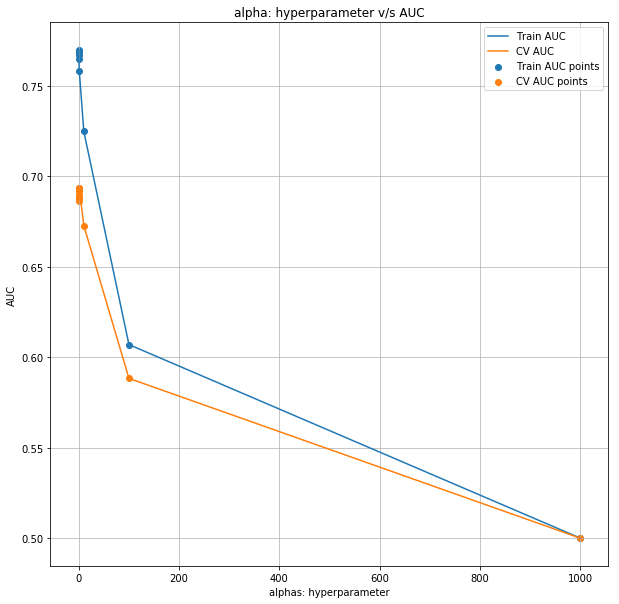

In [57]:

plt.figure(figsize=(10,10))
plt.plot(alphas, train_auc, label='Train AUC')
plt.plot(alphas, cv_auc, label='CV AUC')

plt.scatter(alphas, train_auc, label='Train AUC points')
plt.scatter(alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alphas: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(which='major', alpha=0.9)
plt.show()

### Observations :
    1.There is is steep fall when alpha is greater than 1 which shows that as alpha increases beyond 1 performance reduces steeply.
    2.Best AUC on cross validation is acheived at alpha 0.0001


### RandomSearch CV using K-fold Crossvalidation with k=10

In [59]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

parameters={"alpha" : sp_randint(0.0001,100) }

#RS_log_alphas =[]

#RS_alphas=[0.00001, 0.0001, 0.001, 0.1,0.7,0.8, 1,100,1000]

# for a in tqdm(RS_alphas):
#     b = math.log(a)
#     RS_log_alphas.append(b)
    
clf = RandomizedSearchCV(MB, parameters,return_train_score=True ,cv=10, scoring='roc_auc',verbose=1,n_jobs=10)
clf.fit(X_train_bow, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

RS_alphas=results['param_alpha']
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    6.2s finished


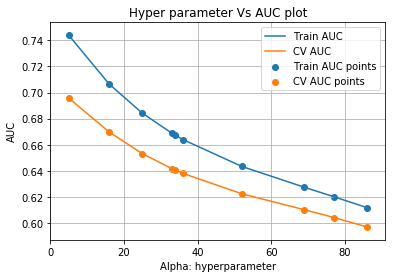

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
9,0.380720,0.114470,0.017478,0.008547,5,{'alpha': 5},0.690013,0.711586,0.710972,0.687821,...,0.743296,0.744372,0.743006,0.745293,0.743349,0.743635,0.743797,0.743408,0.743887,0.000763
4,0.404020,0.119674,0.020120,0.013498,16,{'alpha': 16},0.660111,0.686049,0.689977,0.665957,...,0.705205,0.706741,0.705881,0.707504,0.706198,0.706492,0.705943,0.706767,0.706448,0.000871
6,0.410510,0.109627,0.015958,0.010345,25,{'alpha': 25},0.643747,0.668834,0.675012,0.652397,...,0.682529,0.684328,0.684084,0.685023,0.684072,0.684374,0.683434,0.685134,0.684193,0.000981
7,0.351259,0.126504,0.018051,0.010802,33,{'alpha': 33},0.633130,0.656826,0.664340,0.643136,...,0.666977,0.668928,0.669185,0.669621,0.668837,0.669170,0.668056,0.670305,0.668916,0.001080
3,0.366248,0.121903,0.024679,0.022986,34,{'alpha': 34},0.632005,0.655523,0.663208,0.642104,...,0.665275,0.667236,0.667556,0.667937,0.667162,0.667504,0.666372,0.668675,0.667241,0.001092


In [60]:
plt.plot(RS_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(RS_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(RS_alphas, train_auc, label='Train AUC points')
plt.scatter(RS_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

#### Observations :
        1. We can see a steady fall in the AUC value as alpha increases.
     

### Train the Model using the best hyper parameter value 

In [61]:
### https://forums.fast.ai/t/hyperparameter-random-search-interpretation/8591 ---to get the best hyper parameter as a reuslt of Random search
best_alpha = clf.best_params_
print('Best Alpha as a result of Random Search',best_alpha)

Best Alpha as a result of Random Search {'alpha': 5}


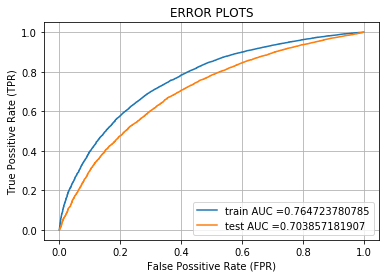

In [62]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


MB_bow = MultinomialNB(alpha = 0.1,class_prior=[0.5,0.5])
MB_bow.fit(X_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(MB_bow, X_train_bow)    
y_test_pred = batch_predict(MB_bow, X_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Possitive Rate (FPR)")
plt.ylabel("True Possitive Rate (TPR)")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Observations:
     1. Train AUC observed to be 0.76 and Test AUC observed to be 0.704 when considering the best alpha.

### CONFUSION MATRIX

In [63]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [64]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.489766545636 for threshold 0.506
Train confusion matrix
[[ 5259  2167]
 [12835 28780]]
Test confusion matrix
[[ 3426  2033]
 [ 9774 20819]]


#### Ploting Confusion Matrix on Train data

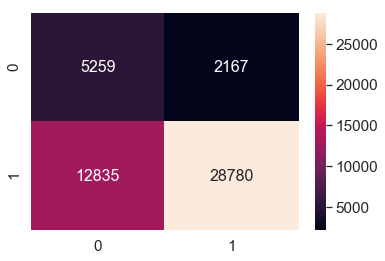

In [65]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

#### Plotting Cnfusion Matrix on Test Data

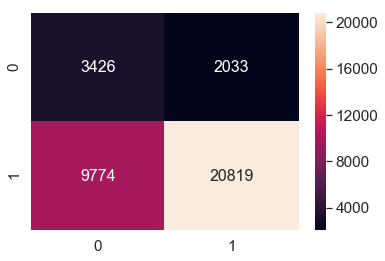

In [66]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

### Observations :
    1.We can observe from train and test we are getting majority True positives
    2.Least number of data falls in False negative,which refers as least number of projects were incorrectly predicted as not approved in both Test and Train.
    3.For a model to perform well we need High True Positive Rate and Low False Positive Rate.From the above our train data has True Positive Rate as 92% and False Positive Rate as 70%
    4.In our test data : True Positive Rate as 91% and False Positive Rate as 73%. 

####  SET2 :Apply Multinomial NB on these feature sets (categorical, numerical features + preprocessed_eassay (TFIDF))

#### Step 1 : Find best hyperparameter with maximum AUC 

In [67]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack


X_train_tfidf = hstack((train_categories, train_subcategories,sklstate_train,teacher_prefix_train,
            proj_grade_train,tfidf_essay_train,tfidf_title_train,
            X_train_price_norm,quantity_train_norm,prev_projects_train_norm,title_word_count_train_norm,
            essay_word_count_train_norm)).tocsr()

X_test_tfidf = hstack((test_categories, test_subcategories,sklstate_test,teacher_prefix_test,
            proj_grade_test,tfidf_essay_test,tfidf_title_test,
            X_test_price_norm,quantity_test_norm,prev_projects_test_norm,title_word_count_test_norm,
            essay_word_count_test_norm)).tocsr()

X_cv_tfidf = hstack((cv_categories, cv_subcategories,sklstate_cv,teacher_prefix_cv,
            proj_grade_cv,tfidf_essay_cv,tfidf_title_cv,
            X_cv_price_norm,quantity_cv_norm,prev_projects_cv_norm,title_word_count_cv_norm,
            essay_word_count_cv_norm)).tocsr()


print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(X_cv_tfidf.shape)

(49041, 7113)
(36052, 7113)
(24155, 7113)


In [68]:
print("Final Data matrix")
print(X_train_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7113) (49041,)
(24155, 7113) (24155,)
(36052, 7113) (36052,)


In [69]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import seaborn as sns 
import math

### Consider alphas values
train_auc=[]
cv_auc=[]
alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,  100,  1000]
scaled_alpha=[]

for i in tqdm(alphas):
    MB=MultinomialNB(class_prior=[0.5,0.5],alpha=i)
    MB.fit(X_train_tfidf, y_train)
    y_train_pred = batch_predict(MB, X_train_tfidf)    
    y_cv_pred = batch_predict(MB, X_cv_tfidf)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

## Scaling the alphas.
# min_alpha=min(alphas)
# max_alpha=max(alphas)
# for i in tqdm(alphas):
#     scaled_alpha.append((max_alpha-i)/(max_alpha -min_alpha))
        

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  6.77it/s]


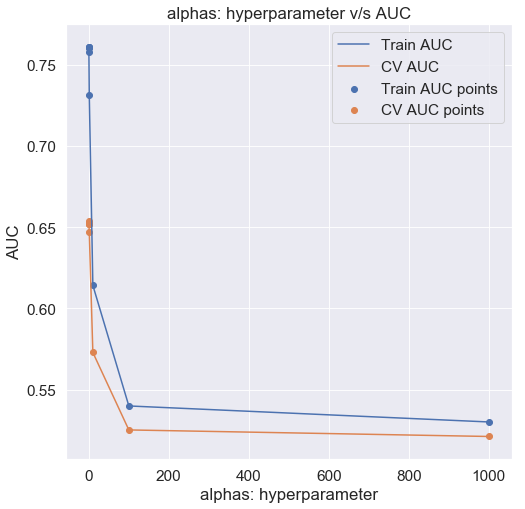

In [73]:

plt.figure(figsize=(8,8))
plt.plot(alphas, train_auc, label='Train AUC')
plt.plot(alphas, cv_auc, label='CV AUC')

plt.scatter(alphas, train_auc, label='Train AUC points')
plt.scatter(alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alphas: hyperparameter")
plt.ylabel("AUC")
plt.title("alphas: hyperparameter v/s AUC")
plt.grid(which='major', alpha=0.9)
plt.show()

### Observations :
    1. Above plot shows that Train_data has higher AUC than Cross validation data.
    2.There is is steep fall when alpha is greater than 0.001 which shows that as alpha increases beyond 0.001 performance reduces steeply.


### RandomSearch CV using K-fold Crossvalidation with k=10

In [75]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

parameters={"alpha" : sp_randint(0.001,100) }

#RS_log_alphas =[]

#RS_alphas=[0.00001, 0.0001, 0.001, 0.1,0.7,0.8, 1,100,1000]

# for a in tqdm(RS_alphas):
#     b = math.log(a)
#     RS_log_alphas.append(b)
    
clf = RandomizedSearchCV(MB, parameters, cv=10,return_train_score=True,scoring='roc_auc',verbose=1,n_jobs=10)
clf.fit(X_train_tfidf, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

RS_alphas=results['param_alpha']
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']




Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    5.2s finished


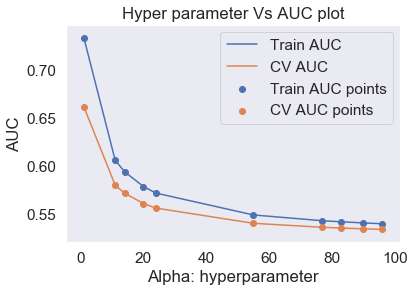

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.353951,0.095472,0.024635,0.019147,1,{'alpha': 1},0.656654,0.678948,0.671653,0.658960,...,0.734155,0.733256,0.733427,0.735326,0.733570,0.733743,0.734920,0.733066,0.734082,0.000964
7,0.377292,0.057856,0.014861,0.010077,11,{'alpha': 11},0.569192,0.589660,0.594393,0.585483,...,0.604553,0.605507,0.607758,0.605547,0.605306,0.606563,0.605165,0.607539,0.605991,0.001184
3,0.320244,0.096062,0.014062,0.009307,14,{'alpha': 14},0.560949,0.580587,0.586078,0.577900,...,0.592443,0.593452,0.595987,0.593416,0.593066,0.594632,0.593067,0.595771,0.593970,0.001281
0,0.294511,0.080867,0.011968,0.003567,20,{'alpha': 20},0.550755,0.568740,0.575343,0.568131,...,0.576866,0.577944,0.580798,0.577876,0.577258,0.579269,0.577545,0.580574,0.578493,0.001395
2,0.333807,0.116230,0.012368,0.004305,24,{'alpha': 24},0.546300,0.563554,0.570532,0.563775,...,0.569999,0.571092,0.574069,0.571036,0.570265,0.572465,0.570699,0.573840,0.571654,0.001439


In [76]:
plt.plot(RS_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(RS_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(RS_alphas, train_auc, label='Train AUC points')
plt.scatter(RS_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

#### Observations :
    1. Above plot shows that Train_data has higher AUC than Cross validation data.
    2.There is is steep fall when alpha is greater than 0.001 which shows that as alpha increases beyond 0.001 performance reduces steeply.
    3.Alpha at which cross validation AUC is maximum is 1.

### Train the Model using the best hyper parameter value 

In [77]:
### https://forums.fast.ai/t/hyperparameter-random-search-interpretation/8591 ---to get the best hyper parameter as a reuslt of Random search
best_alpha = clf.best_params_
print('Best Alpha as a result of Random Search',best_alpha)

Best Alpha as a result of Random Search {'alpha': 1}


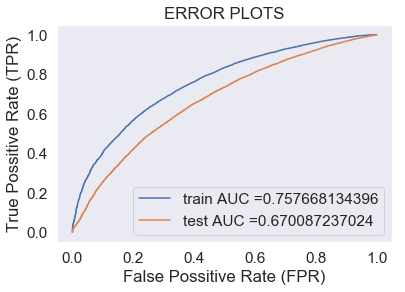

In [78]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


MB_tfidf = MultinomialNB(alpha = 0.1,class_prior=[0.5,0.5])
MB_tfidf.fit(X_train_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(MB_tfidf, X_train_tfidf)    
y_test_pred = batch_predict(MB_tfidf, X_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Possitive Rate (FPR)")
plt.ylabel("True Possitive Rate (TPR)")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Observations:
     1. Train AUC observed to be 0.75 and Test AUC observed to be 0.67 when considering the best alpha.

### CONFUSION MATRIX

In [79]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [80]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.474991747645 for threshold 0.505
Train confusion matrix
[[ 5240  2186]
 [13602 28013]]
Test confusion matrix
[[ 3240  2219]
 [10493 20100]]


#### Ploting Confusion Matrix on Train data

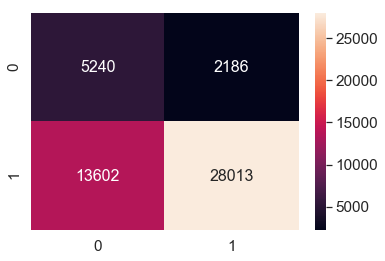

In [81]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

#### Plotting Cnfusion Matrix on Test Data

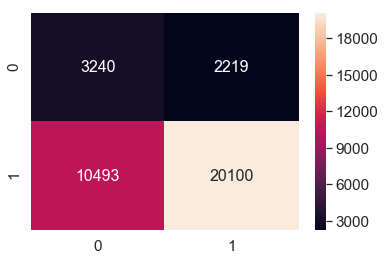

In [82]:
### PLOT the matrix for Train
# source : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size
plt.show()

### Observations :
    1.We can observe from train and test we are getting majority True positives
    2.Least number of data falls in False negative,which refers as least number of projects were incorrectly predicted as not approved in both Test and Train.
    3.For a model to perform well we need High True Positive Rate and Low False Positive Rate.From the above our train data has True Positive Rate as 93% and False Positive Rate as 72%
    4.In our test data : True Positive Rate as 90% and False Positive Rate as 76%. 

###  Step 4: finding the top 20 features from either from feature Set 1  absolute values of feature_log_prob_    parameter of MultinomialNB

In [83]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
## Reference  : https://datascience.stackexchange.com/questions/65219/find-the-top-n-features-from-feature-set-using-absolute-values-of-feature-log-p

from scipy.sparse import hstack


X_train_bow = hstack((train_categories, train_subcategories,sklstate_train,teacher_prefix_train,
            proj_grade_train,bow_essay_train,bow_title_train,
            X_train_price_norm,quantity_train_norm,prev_projects_train_norm,title_word_count_train_norm,
            essay_word_count_train_norm)).tocsr()

X_test_bow = hstack((test_categories, test_subcategories,sklstate_test,teacher_prefix_test,
            proj_grade_test,bow_essay_test,bow_title_test,
            X_test_price_norm,quantity_test_norm,prev_projects_test_norm,title_word_count_test_norm,
            essay_word_count_test_norm)).tocsr()

X_cv_bow = hstack((cv_categories, cv_subcategories,sklstate_cv,teacher_prefix_cv,
            proj_grade_cv,bow_essay_cv,bow_title_cv,
            X_cv_price_norm,quantity_cv_norm,prev_projects_cv_norm,title_word_count_cv_norm,
            essay_word_count_cv_norm)).tocsr()


print(X_train_bow.shape)
print(X_test_bow.shape)
print(X_cv_bow.shape)

(49041, 7113)
(36052, 7113)
(24155, 7113)


In [84]:
## Train the model with the chosesn hyper parameter
MB=MultinomialNB(class_prior=[0.5,0.5],alpha=0.1)
MB.fit(X_train_bow,y_train)

MultinomialNB(alpha=0.1, class_prior=[0.5, 0.5])

In [85]:
### sort all the features based on the log probabalilities using argsort
# Possitive class
class_1_sorted_prob=MB.feature_log_prob_[1,:].argsort()
class_0_sorted_prob=MB.feature_log_prob_[0,:].argsort()

In [86]:
features_lst=list(cat_vectorize.get_feature_names()+ subcat_vectorize.get_feature_names()+
                 sklstate_vectorize.get_feature_names()+teacher_prefix_vectorize.get_feature_names()+
            proj_grade_vectorize.get_feature_names()+bow_essay.get_feature_names()+bowtitle.get_feature_names()+
            ["price"]+['Quantity']+['teacher_number_of_previously_posted_projects']+['words_in_title']+
            ['words_in_essay'])

In [87]:
Most_imp_words_1 = []
Most_imp_words_0 = []

for index in class_1_sorted_prob[-20:-1]:
    Most_imp_words_1.append(features_lst[index])

for index in class_0_sorted_prob[-20:-1]:
    Most_imp_words_0.append(features_lst[index])

print("20 most imp features for positive class:\n")
print(Most_imp_words_1)

print("\n" + "-"*100)

print("\n20 most imp features for negative class:\n")
print(Most_imp_words_0)

20 most imp features for positive class:

['technology', 'would', 'class', 'come', 'able', 'day', 'love', 'use', 'reading', 'work', 'need', 'nannan', 'many', 'help', 'learn', 'not', 'classroom', 'learning', 'school']

----------------------------------------------------------------------------------------------------

20 most imp features for negative class:

['class', 'use', 'day', 'skills', 'able', 'reading', 'materials', 'love', 'come', 'work', 'need', 'many', 'nannan', 'help', 'learn', 'not', 'classroom', 'learning', 'school']


### Observations:
    1.Both the negetive and possitive class tends to have similar words/features as most important with difference in ordering.

#### FInal Representation

In [88]:
##http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", " Train AUC" ,"Test AUC "]

x.add_row(["BOW", "Multinomial Naive Bayes", 0.1, 0.76,0.70])
x.add_row(["TFIDF", "Multinomial Naive Bayes",0.1, 0.75, 0.67])

print(x)

+------------+-------------------------+-----------------+------------+-----------+
| Vectorizer |          Model          | Hyper Parameter |  Train AUC | Test AUC  |
+------------+-------------------------+-----------------+------------+-----------+
|    BOW     | Multinomial Naive Bayes |       0.1       |    0.76    |    0.7    |
|   TFIDF    | Multinomial Naive Bayes |       0.1       |    0.75    |    0.67   |
+------------+-------------------------+-----------------+------------+-----------+
